# 天池蒸汽项目比赛

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 数据加载

In [2]:
train_raw = pd.read_csv('./zhengqi_train.txt', sep='\t')
train_raw.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [3]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
test_raw = pd.read_csv('./zhengqi_test.txt', sep='\t')
test_raw.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [5]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [6]:
# 重复值检查
print('train', train_raw.duplicated().sum())
print('test', test_raw.duplicated().sum())

train 0
test 0


# 数据探索

In [7]:
label_col = ['target']
features_col = test_raw.columns

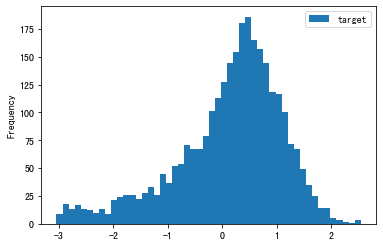

In [8]:
# target 分布
train_raw[label_col].plot(kind='hist', bins=50)
plt.show()

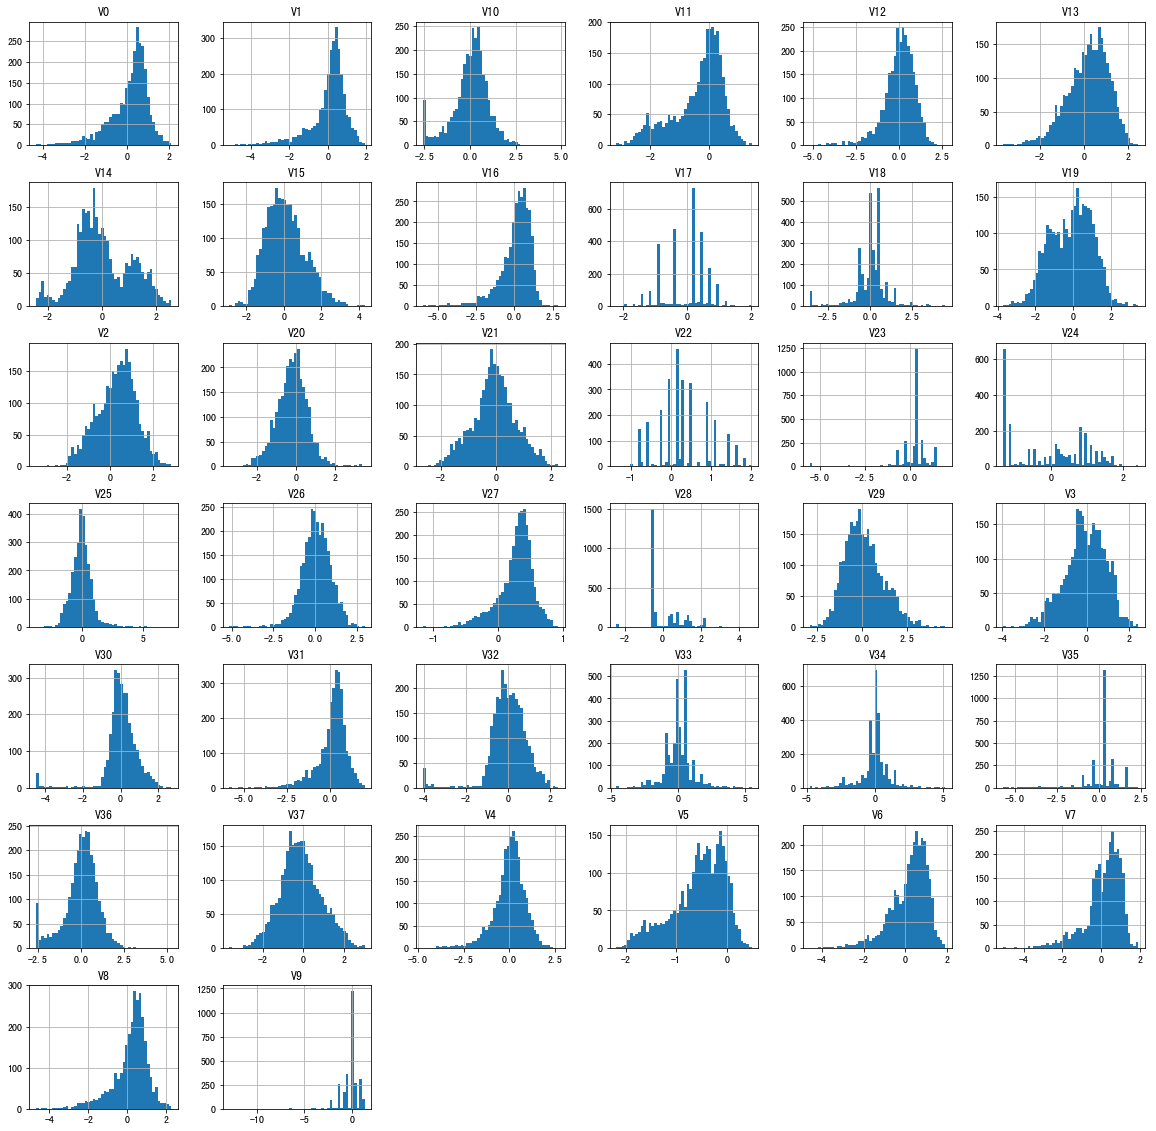

In [9]:
# 特征分布
train_raw[features_col].hist(bins=50, figsize=(20, 20))
plt.show()

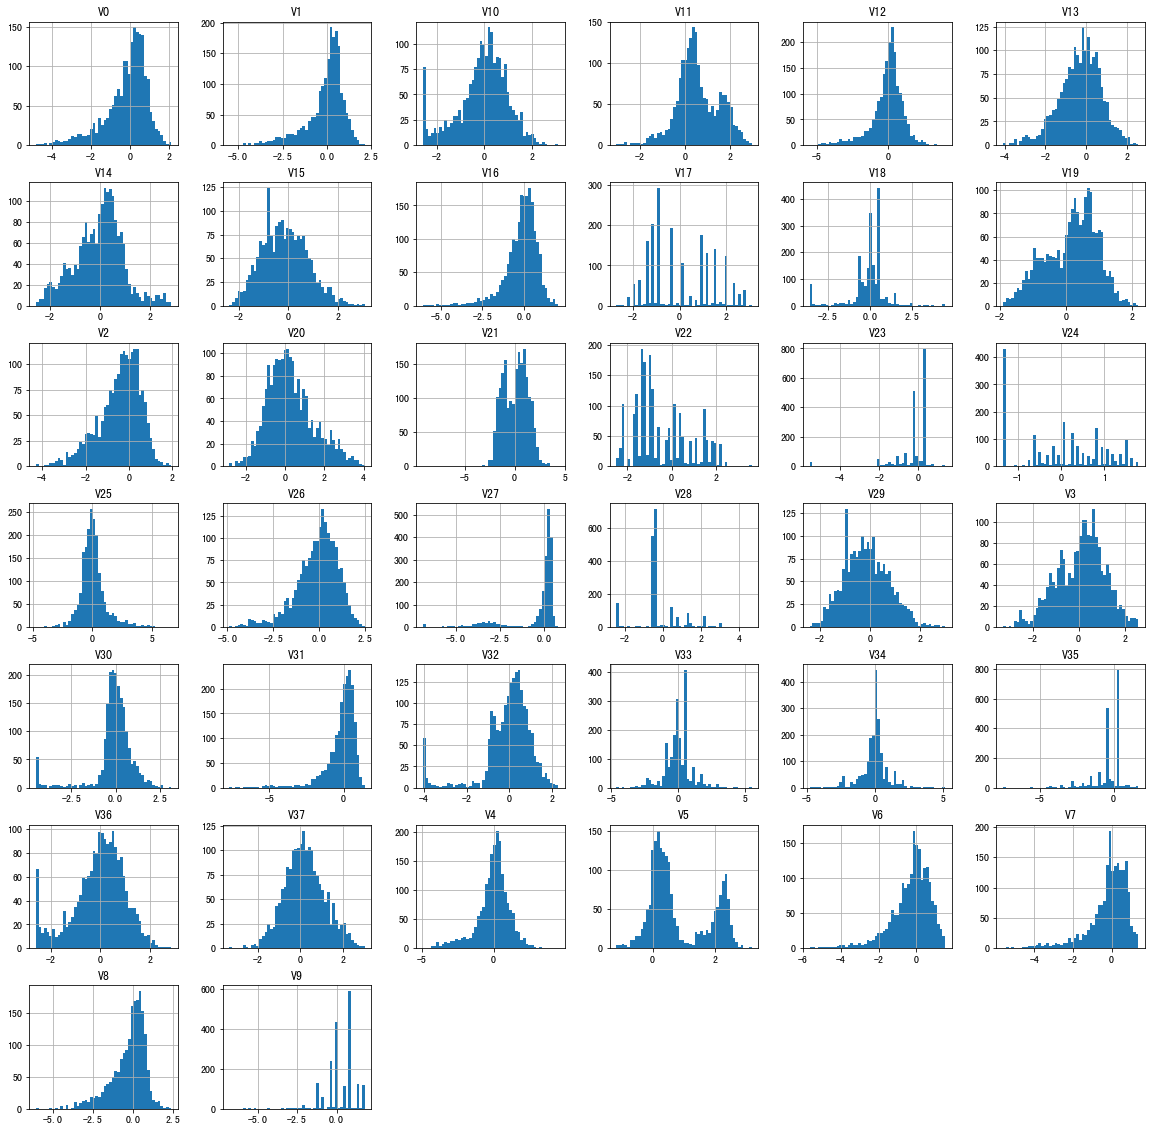

In [10]:
test_raw[features_col].hist(bins=50, figsize=(20, 20))
plt.show()

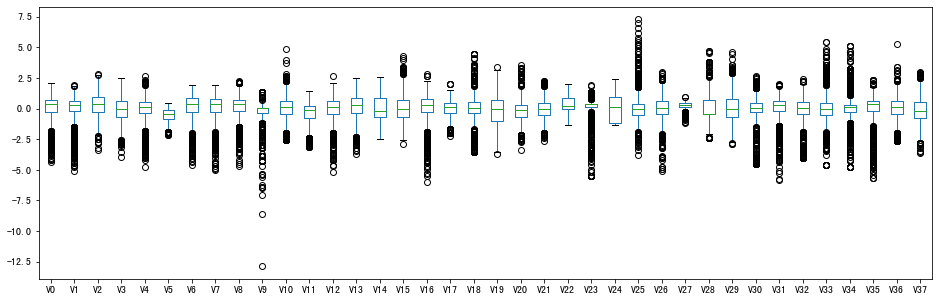

In [11]:
train_raw[features_col].plot(kind='box', figsize=(16, 5))
plt.show()

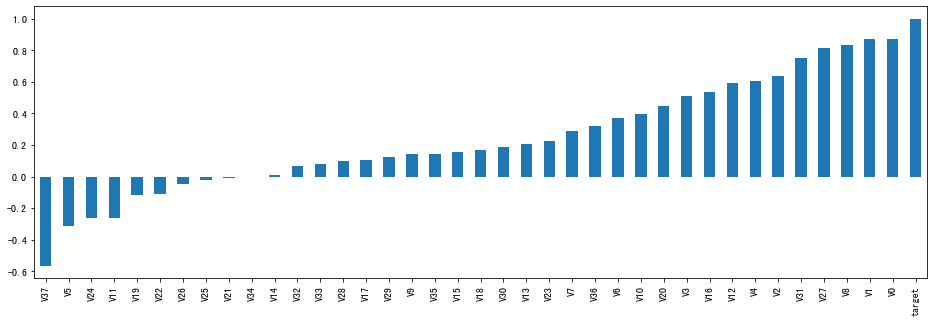

In [12]:
# 相关性
train_raw.corrwith(train_raw['target']).sort_values().plot(kind='bar', figsize=(16, 5))
plt.show()

# 特征工程

In [13]:
train_features = train_raw[features_col].copy()
test_features = test_raw.copy()

In [14]:
# 删除相关性不大的特征
threshold = 0.1
temp = abs(train_features.corrwith(train_raw['target']).sort_values())
col = temp[temp > threshold].index.tolist()
train_features = train_features[col]
test_features = test_features[col]

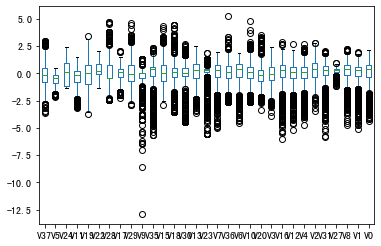

In [15]:
train_features.plot(kind='box')
plt.show()

## 数据标准化

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss = StandardScaler()
label = train_raw[label_col]
train = ss.fit_transform(train_features)
test = ss.transform(test_features)

print('label', label.shape)
print('train', train.shape)
print('test', test.shape)

label (2888, 1)
train (2888, 31)
test (1925, 31)


## 训练数据拆分

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_x, val_x, train_y, val_y = train_test_split(train, label)
print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('val_x', val_x.shape)
print('val_y', val_y.shape)

train_x (2166, 31)
train_y (2166, 1)
val_x (722, 31)
val_y (722, 1)


# 模型训练与评估

In [20]:
from sklearn.metrics import mean_squared_error

## LR

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(train_x, train_y)
predict_lr = lr.predict(val_x)
mean_squared_error(predict_lr, val_y)

0.1253134206483576

In [23]:
lr_sub = LinearRegression()
lr_sub.fit(train, label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## LASSON

In [24]:
from sklearn.linear_model import LassoCV

In [25]:
la = LassoCV()
la.fit(train_x, train_y)
predict_la = la.predict(val_x)
mean_squared_error(predict_la, val_y)

0.12463317961341905

In [26]:
la_sub = LinearRegression()
la_sub.fit(train, label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_x, train_y)
predict_knn = knn.predict(val_x)
mean_squared_error(predict_knn, val_y)

0.19486207933518007

## LightGBM

In [29]:
from lightgbm import LGBMRegressor

In [30]:
lgb = LGBMRegressor(n_estimators=300)
lgb.fit(train_x, train_y)
predict_lgb = lgb.predict(val_x)
mean_squared_error(predict_lgb, val_y)

0.11817561389007321

In [31]:
lgb_sub = LGBMRegressor(n_estimators=300)
lgb_sub.fit(train, label)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## XGBOOST

In [32]:
from xgboost import XGBRegressor

In [33]:
xgb = XGBRegressor()
xgb.fit(train_x, train_y)
predict_xgb = xgb.predict(val_x)
mean_squared_error(predict_xgb, val_y)

0.13076605769821792

In [34]:
xgb_sub = XGBRegressor()
xgb_sub.fit(train, label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# 学习曲线

In [35]:
from sklearn.model_selection import learning_curve

In [36]:
def plot_learn_curve(estimator, x, y):
    
    train_sizes_abs, train_scores, test_scores = learning_curve(
        estimator=estimator, X=x, y=y, cv=3,
        train_sizes=np.array([0.1, 0.33, 0.55, 0.78, 1. ]), 
        scoring='neg_mean_squared_error'
    )
    
    plt.plot(train_scores.mean(axis=1), label='train')
    print(train_scores.mean(axis=1))
    plt.plot(test_scores.mean(axis=1), label='test')
    print(test_scores.mean(axis=1))
    plt.axhline(y=0,c="r")
    plt.xticks(ticks=[x for x in range(5)], labels=train_sizes_abs)
    plt.legend()
    plt.grid()
    plt.show()

[-0.07066285 -0.07477399 -0.09243864 -0.09265145 -0.10744474]
[-0.36622791 -0.16096573 -0.14263478 -0.1242157  -0.117531  ]


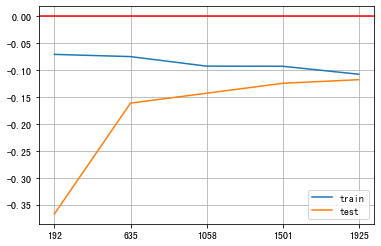

In [37]:
# plot_learn_curve(LGBMRegressor(n_estimators=300), train, label)
plot_learn_curve(LinearRegression(), train, label)

# 模型融合

In [38]:
# xgboost + lightgbm
xgb_mse = mean_squared_error(predict_xgb, val_y)
lgb_mse = mean_squared_error(predict_lgb, val_y)

xgb_weight = lgb_mse / (xgb_mse + lgb_mse)
lgb_weight = xgb_mse / (xgb_mse + lgb_mse)

xgb_sub_data = xgb_sub.predict(test)
lgb_sub_data = lgb_sub.predict(test)

result = xgb_sub_data * xgb_weight + lgb_sub_data * lgb_weight
pd.DataFrame(result).to_csv('./xbg_lgb.txt', header=False, index=False)

In [39]:
# lr + lightgbm
lr_mse = mean_squared_error(predict_lr, val_y)
lgb_mse = mean_squared_error(predict_lgb, val_y)

lr_weight = lgb_mse / (lr_mse + lgb_mse)
lgb_weight = lr_mse / (lr_mse + lgb_mse)

lr_sub_data = lr_sub.predict(test)
lgb_sub_data = lgb_sub.predict(test)

result = lr_sub_data * lr_weight + (lgb_sub_data * lgb_weight).reshape(-1, 1)
pd.DataFrame(result).to_csv('./lr_lgb.txt', header=False, index=False)

# 测试集输出

In [40]:
def predict_test_set(estimator, test, file_path):
    sub = estimator.predict(test)
    pd.DataFrame(sub).to_csv(file_path, header=False, index=False)
    return file_path[2:]

In [41]:
predict_test_set(lgb_sub, test, './sub_set_lgb.txt')

'sub_set_lgb.txt'